# Mohamed Tarek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [2]:
df = pd.read_csv("train_creditscore.csv")

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_11396\4181124974.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_creditscore.csv")


In [3]:
#function to print non-numeric values

def non_numeric_values(df, column_name):
    # Use the to_numeric function with errors='coerce' to convert non-numeric values to NaN
    non_numeric_mask = pd.to_numeric(df[column_name], errors='coerce').isna()
    
    # Filter the DataFrame using the mask
    non_numeric_values = df[non_numeric_mask][column_name]
    
    # Print the non-numeric values
    print(f"Non-numeric values in column '{column_name}':")
    print(non_numeric_values)

# KNN imputation

def knn_impute(df, column_name, n_neighbors):
    # Initialize the KNNImputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    # Perform KNN imputation
    df[[column_name]] = imputer.fit_transform(df[[column_name]])[:, 0].reshape(-1, 1)
    return df

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99767 entries, 0 to 99766
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        99767 non-null  object 
 1   Customer_ID               99767 non-null  object 
 2   Month                     99767 non-null  object 
 3   Name                      89804 non-null  object 
 4   Age                       99767 non-null  object 
 5   SSN                       99767 non-null  object 
 6   Occupation                99767 non-null  object 
 7   Annual_Income             99767 non-null  object 
 8   Monthly_Inhand_Salary     84793 non-null  float64
 9   Num_Bank_Accounts         99767 non-null  int64  
 10  Num_Credit_Card           99767 non-null  int64  
 11  Interest_Rate             99767 non-null  int64  
 12  Num_of_Loan               99767 non-null  object 
 13  Type_of_Loan              88399 non-null  object 
 14  Delay_

In [6]:
df.duplicated().sum()

0

# cleaning data

In [7]:
df = df.drop(['Age','ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 
'Changed_Credit_Limit' ,"Payment_Behaviour"  , "Occupation" ,'Payment_of_Min_Amount'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99767 entries, 0 to 99766
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             99767 non-null  object 
 1   Monthly_Inhand_Salary     84793 non-null  float64
 2   Num_Bank_Accounts         99767 non-null  int64  
 3   Num_Credit_Card           99767 non-null  int64  
 4   Interest_Rate             99767 non-null  int64  
 5   Num_of_Loan               99767 non-null  object 
 6   Delay_from_due_date       99767 non-null  int64  
 7   Num_of_Delayed_Payment    92790 non-null  object 
 8   Num_Credit_Inquiries      97807 non-null  float64
 9   Credit_Mix                99767 non-null  object 
 10  Outstanding_Debt          99767 non-null  object 
 11  Credit_Utilization_Ratio  99767 non-null  float64
 12  Credit_History_Age        90761 non-null  object 
 13  Total_EMI_per_month       99767 non-null  float64
 14  Amount

# remove  "_"  from values

In [9]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)] 

rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_11396\3117017196.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)


In [10]:
non_numeric_values(df, 'Num_Bank_Accounts')

Non-numeric values in column 'Num_Bank_Accounts':
Series([], Name: Num_Bank_Accounts, dtype: int64)


In [11]:
# Data Preprocessing: removing negative Values

print("count of values less than zero Before dropping: " ,df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count())

df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)

print("count of values less than zero After dropping: " ,df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()) 

count of values less than zero Before dropping:  21
count of values less than zero After dropping:  0


In [12]:
non_numeric_values(df, 'Num_of_Loan')

df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

Non-numeric values in column 'Num_of_Loan':
Series([], Name: Num_of_Loan, dtype: object)


In [13]:
# Data Preprocessing: removing negative Values

print("count of values less than zero Before dropping: " , df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() )

df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)

print("count of values less than zero After dropping:" , df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() )

count of values less than zero Before dropping:  3864
count of values less than zero After dropping: 0


In [14]:
# Data Preprocessing: removing negative Values

print("count of values less than zero Before dropping: " ,df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count())

df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)

print("count of values less than zero After dropping: " ,df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count())

count of values less than zero Before dropping:  559
count of values less than zero After dropping:  0


In [15]:
# Data Preprocessing: Handling Missing Values

print("Before Knn_impute: ",df['Num_of_Delayed_Payment'].isna().sum())

df = knn_impute(df, 'Num_of_Delayed_Payment',2)

print( "After Knn_impute: ", df['Num_of_Delayed_Payment'].isna().sum())

Before Knn_impute:  6638
After Knn_impute:  0


In [16]:
# Data Preprocessing: Handling Missing Values

print("Before Knn_impute: ",df['Num_Credit_Inquiries'].isna().sum())

df = knn_impute(df, 'Num_Credit_Inquiries',2)

print("After Knn_impute: ",df['Num_Credit_Inquiries'].isna().sum())

Before Knn_impute:  1872
After Knn_impute:  0


In [17]:
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')

print("count of values less than zero After dropping: " ,df.drop(df[df['Monthly_Inhand_Salary'] < 0].index, inplace=True))

count of values less than zero After dropping:  None


In [18]:
# Data Preprocessing: Handling Missing Values

print("Before Knn_impute: ",df['Monthly_Inhand_Salary'].isna().sum())

df = knn_impute(df, 'Monthly_Inhand_Salary',2)

print("After Knn_impute: ",df['Monthly_Inhand_Salary'].isna().sum())

Before Knn_impute:  14301
After Knn_impute:  0


In [19]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

print("count of values less than zero After dropping: " ,df.drop(df[df['Amount_invested_monthly'] < 0].index, inplace=True))

count of values less than zero After dropping:  None


In [20]:
# Data Preprocessing: Handling Missing Values

print("Before Knn_impute: ",df['Amount_invested_monthly'].isna().sum())

df = knn_impute(df, 'Amount_invested_monthly',2)

print("After Knn_impute: ",df['Amount_invested_monthly'].isna().sum())

Before Knn_impute:  4278
After Knn_impute:  0


In [21]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

print("count of values less than zero After dropping: " , df.drop(df[df['Monthly_Balance'] < 0].index, inplace=True))

count of values less than zero After dropping:  None


In [22]:
# Data Preprocessing: Handling Missing Values

print("Before Knn_impute: ",df['Monthly_Balance'].isna().sum())

df = knn_impute(df, 'Monthly_Balance',2)

print("After Knn_impute: ",df['Monthly_Balance'].isna().sum())

Before Knn_impute:  1145
After Knn_impute:  0


In [23]:
print("Number of null values for Credit_Mix: ",df['Credit_Mix'].isna().sum())

Number of null values for Credit_Mix:  19296


In [24]:
# Fill null values in 'Credit_Mix' with 'Unknown'
df['Credit_Mix'].fillna('Unknown', inplace=True)

print("Number of null values after adjusting: ",df['Credit_Mix'].isna().sum())

Number of null values after adjusting:  0


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_11396\3095729608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Mix'].fillna('Unknown', inplace=True)


In [25]:
print("Number of null values for Credit_History_Age:" ,df['Credit_History_Age'].isna().sum())

Number of null values for Credit_History_Age: 8603


In [26]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_History_Age' with the mode for each group
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

print("Number of null values after adjusting:",df['Credit_History_Age'].isna().sum())

Number of null values after adjusting: 0


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_11396\1985929632.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [27]:
# Extract years and months from 'Credit_History_Age' column
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

In [28]:
# Convert years to months and add with months to get total months
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

In [29]:
df['Annual_Income'] = df['Annual_Income'].astype(float)

df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [30]:
# Label Encoding

label_encoder = LabelEncoder()

df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'])

df['Credit_Mix'] = label_encoder.fit_transform(df['Credit_Mix'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95314 entries, 0 to 99766
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Annual_Income              95314 non-null  float64
 1   Monthly_Inhand_Salary      95314 non-null  float64
 2   Num_Bank_Accounts          95314 non-null  int64  
 3   Num_Credit_Card            95314 non-null  int64  
 4   Interest_Rate              95314 non-null  int64  
 5   Num_of_Loan                95314 non-null  int64  
 6   Delay_from_due_date        95314 non-null  int64  
 7   Num_of_Delayed_Payment     95314 non-null  float64
 8   Num_Credit_Inquiries       95314 non-null  float64
 9   Credit_Mix                 95314 non-null  int32  
 10  Outstanding_Debt           95314 non-null  float64
 11  Credit_Utilization_Ratio   95314 non-null  float64
 12  Total_EMI_per_month        95314 non-null  float64
 13  Amount_invested_monthly    95314 non-null  float64


# Visualization

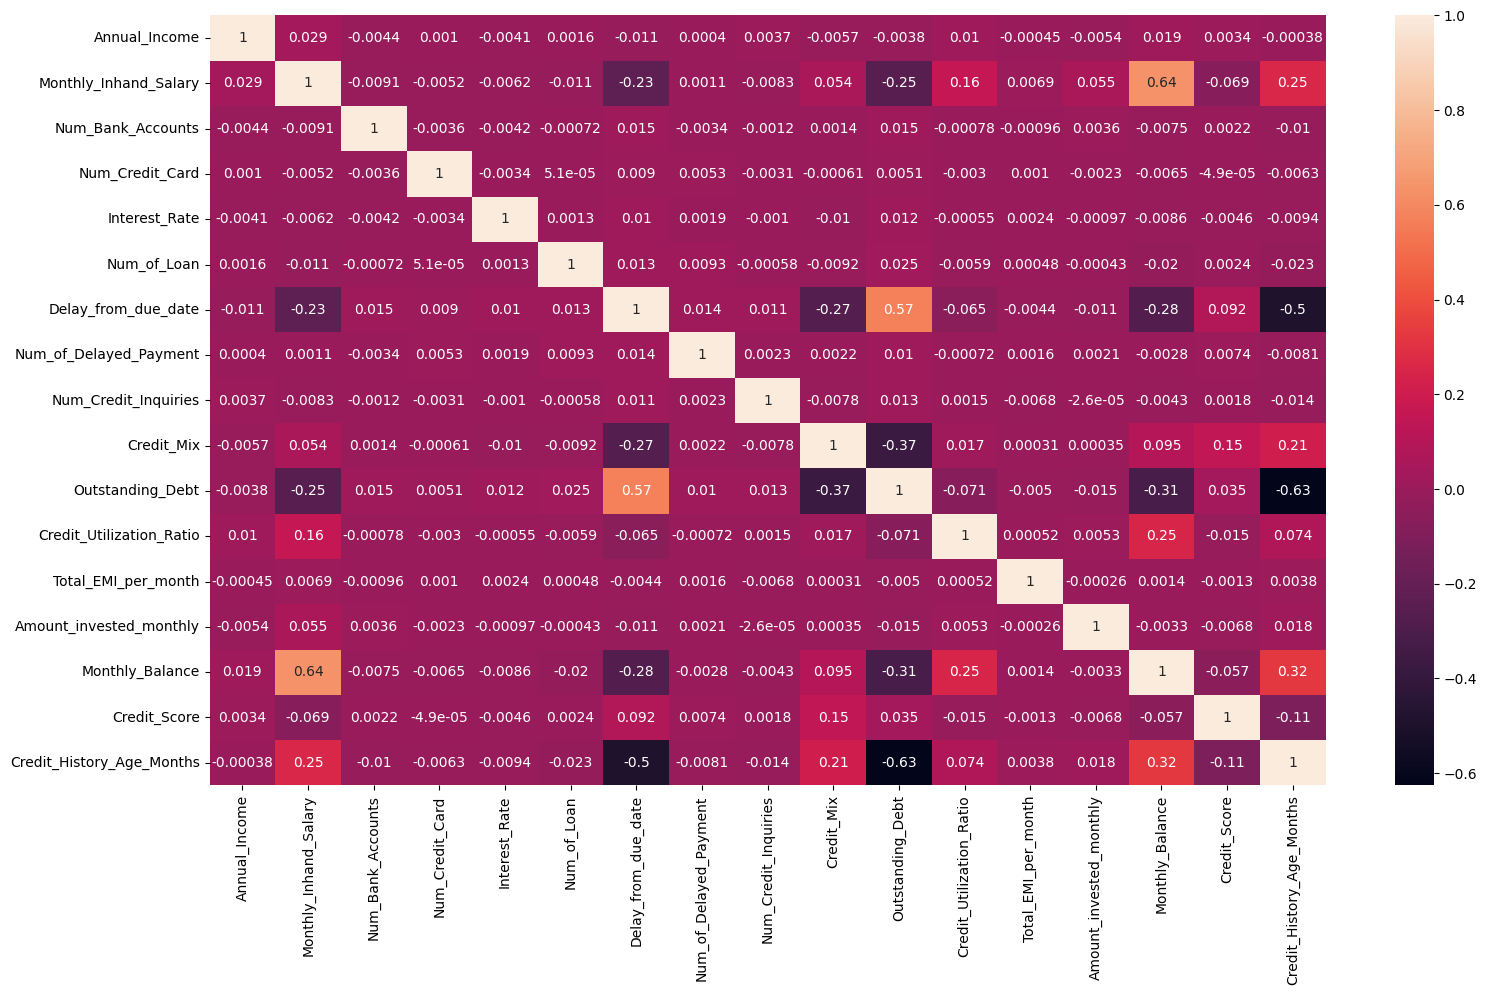

In [32]:
plt.figure(figsize=(18, 10))
sn.heatmap(df.select_dtypes(include='number').corr(), annot = True);


# Feature Selection

In [33]:
corr_matrix = df.corr()

high_corr_pairs = np.where(np.abs(corr_matrix) > 0.5)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated pairs (correlation > 0.5):")
print(high_corr_pairs)

# Remove one feature from each highly correlated pair
features_to_remove = set()
for pair in high_corr_pairs:
    feature1, feature2 = pair
    features_to_remove.add(feature2)

# Create a new DataFrame with the selected features removed
df_reduced = df.drop(columns=list(features_to_remove))


Highly correlated pairs (correlation > 0.5):
[('Monthly_Inhand_Salary', 'Monthly_Balance'), ('Delay_from_due_date', 'Outstanding_Debt'), ('Outstanding_Debt', 'Credit_History_Age_Months')]


# save to new CSV file 

In [34]:
df_reduced.to_csv("Creditscore_train_new.csv", index=False)

In [35]:
df = pd.read_csv('Creditscore_train_new.csv')
df.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,19114.12,1824.843333,3,4,3,4,3,7.000000,4.0,3,26.822620,49.574949,80.415295,0
1,19114.12,4186.454243,3,4,3,4,3,7.000000,4.0,1,28.609352,49.574949,81.699521,0
2,19114.12,4186.454243,3,4,3,4,5,4.000000,4.0,1,31.377862,49.574949,199.458074,0
3,19114.12,1824.843333,3,4,3,4,6,31.058905,4.0,1,24.797347,49.574949,41.420153,0
4,19114.12,4186.454243,3,4,3,4,8,4.000000,4.0,1,27.262259,49.574949,62.430172,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95314 entries, 0 to 95313
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             95314 non-null  float64
 1   Monthly_Inhand_Salary     95314 non-null  float64
 2   Num_Bank_Accounts         95314 non-null  int64  
 3   Num_Credit_Card           95314 non-null  int64  
 4   Interest_Rate             95314 non-null  int64  
 5   Num_of_Loan               95314 non-null  int64  
 6   Delay_from_due_date       95314 non-null  int64  
 7   Num_of_Delayed_Payment    95314 non-null  float64
 8   Num_Credit_Inquiries      95314 non-null  float64
 9   Credit_Mix                95314 non-null  int64  
 10  Credit_Utilization_Ratio  95314 non-null  float64
 11  Total_EMI_per_month       95314 non-null  float64
 12  Amount_invested_monthly   95314 non-null  float64
 13  Credit_Score              95314 non-null  int64  
dtypes: flo

# Data Preparation

In [37]:
X = df.drop('Credit_Score', axis = 1)
y = df['Credit_Score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (76251, 13) (76251,)
Testing set shape: (19063, 13) (19063,)


# Normalize data 

In [40]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)


# Train a RandomForestClassifier

In [41]:
rf_clf = RandomForestClassifier(n_estimators=150, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')

Random Forest Accuracy: 0.77


In [43]:
# Predict on the test set
y_test_pred = rf_clf.predict(X_test)

# Decode the predictions back to original labels
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual_Credit_Score': y_test_decoded,
    'Predicted_Credit_Score': y_test_pred_decoded
})

# Define a mapping from label to creditworthiness
credit_worthy_mapping = {
    'Bad': 'No',
    'Standard': 'Yes',
    'Good': 'Yes'
}

# Map actual and predicted values to creditworthiness
comparison_df['Actual_Credit_Worthy'] = comparison_df['Actual_Credit_Score'].map(credit_worthy_mapping)
comparison_df['Predicted_Credit_Worthy'] = comparison_df['Predicted_Credit_Score'].map(credit_worthy_mapping)

# Convert creditworthiness to binary values (Yes -> 1, No -> 0)
comparison_df['Actual_Credit_Worthy_Binary'] = comparison_df['Actual_Credit_Worthy'].apply(lambda x: 1 if x == 'Yes' else 0)
comparison_df['Predicted_Credit_Worthy_Binary'] = comparison_df['Predicted_Credit_Worthy'].apply(lambda x: 1 if x == 'Yes' else 0)

# Print only the first 20 comparisons
print(comparison_df[['Actual_Credit_Worthy', 'Predicted_Credit_Worthy', 'Actual_Credit_Score', 'Predicted_Credit_Score']].head(20))


   Actual_Credit_Worthy Predicted_Credit_Worthy Actual_Credit_Score  \
0                   Yes                     Yes                Good   
1                   Yes                     Yes            Standard   
2                   Yes                     Yes            Standard   
3                   Yes                     Yes            Standard   
4                   Yes                     Yes            Standard   
5                   Yes                     Yes            Standard   
6                   Yes                     Yes            Standard   
7                   Yes                     Yes            Standard   
8                   Yes                     Yes            Standard   
9                    No                     Yes                 Bad   
10                  Yes                     Yes            Standard   
11                  Yes                     Yes            Standard   
12                  Yes                     Yes            Standard   
13    

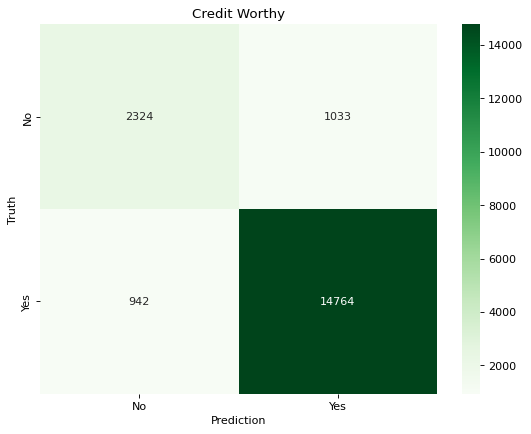

Accuracy of Random Forest: 89.63961601007186 

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3357
           1       0.76      0.78      0.77      5585
           2       0.79      0.79      0.79     10121

    accuracy                           0.77     19063
   macro avg       0.76      0.75      0.75     19063
weighted avg       0.77      0.77      0.77     19063



In [44]:
# Calculate confusion matrix
rf_conf_matrix = confusion_matrix(comparison_df['Actual_Credit_Worthy_Binary'], comparison_df['Predicted_Credit_Worthy_Binary'])

# Calculate accuracy matrix
rf_acc_score = accuracy_score(comparison_df['Actual_Credit_Worthy_Binary'], comparison_df['Predicted_Credit_Worthy_Binary'])

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(rf_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Credit Worthy')
plt.xlabel('Prediction')
plt.ylabel('Truth')
# plt.subplots(figsize=(9, 6))
plt.show(ax)
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

In [45]:
def predict_creditworthiness(new_data, model, scaler, label_encoder):
    original_data = new_data.copy()
    new_data_scaled = scaler.transform(new_data)
    new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)
    
    # Predict using the trained model
    predictions = model.predict(new_data_scaled)
    
    # Decode the predictions back to original labels
    predictions = label_encoder.inverse_transform(predictions)
    
    # Define a mapping from label to creditworthiness
    credit_worthy_mapping = {
        'Bad': 'No',
        'Standard': 'Yes',
        'Good': 'Yes'
    }
    
    # Add predictions to original data for clarity
    original_data['Predicted_Credit_Score'] = predictions
    original_data['Credit_Worthy'] = original_data['Predicted_Credit_Score'].map(credit_worthy_mapping)
    
    return original_data

In [46]:
# Test the function with the new data

new_data = pd.read_csv("Creditscore_test_new.csv" ) # Replace with the path to your new dataset
predicted_data = predict_creditworthiness(new_data, rf_clf, scaler, label_encoder)
print(predicted_data[['Credit_Worthy', 'Predicted_Credit_Score']])


C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


      Credit_Worthy Predicted_Credit_Score
0                No                    Bad
1                No                    Bad
2                No                    Bad
3                No                    Bad
4                No                    Bad
...             ...                    ...
95531           Yes               Standard
95532           Yes               Standard
95533            No                    Bad
95534           Yes                   Good
95535           Yes                   Good

[95536 rows x 2 columns]
